In [1]:
push!(LOAD_PATH, pwd())
using CircleFit, DataGen

┌ Info: Precompiling DataGen [top-level]
└ @ Base loading.jl:1260


In [2]:
using LinearAlgebra, Plots; pyplot();

In [3]:
const σ = 0.01;

In [4]:
noise() = σ * randn();

In [5]:
function circle_generator(xc::Float64, yc::Float64, r::Float64)
    xs = []
    ys = []
    for θ = 0:0.1:2π
        x = xc + r * cos(θ)
        y = yc + r * sin(θ)
        u = ([x, y] - [xc, yc]) / norm([x, y] - [xc, yc])
        rvec = (([x, y] - [xc, yc]) + noise() * u) + [xc, yc]
        push!(xs, rvec[1])
        push!(ys, rvec[2])
    end
    xs, ys
end

circle_generator (generic function with 1 method)

In [6]:
function circle(xc::Float64, yc::Float64, r::Float64)
    xs = []
    ys = []
    for θ = 0:0.1:2π
        x = xc + r * cos(θ)
        y = yc + r * sin(θ)
        push!(xs, x)
        push!(ys, y)
    end
    xs, ys
end

circle (generic function with 1 method)

In [7]:
const xc = 1.
const yc = 0.
#const r  = 2.3;

In [36]:
params = S21Params{Float64}();

In [67]:
fs = params.fᵣ-0.04:0.0001:params.fᵣ+0.04
vs = [S₂₁(f, params) for f in fs];

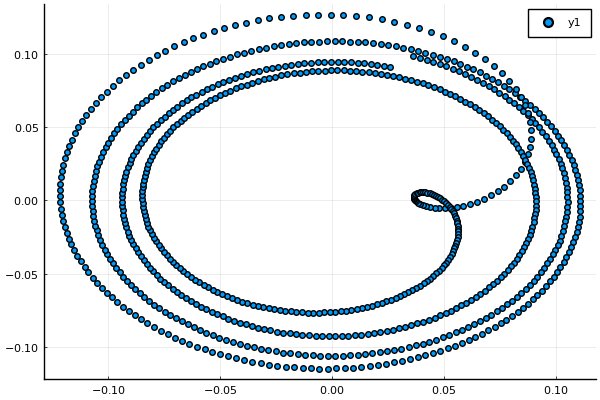

In [68]:
plot(real.(vs), imag.(vs), seriestype=:scatter, linewidth=.01)

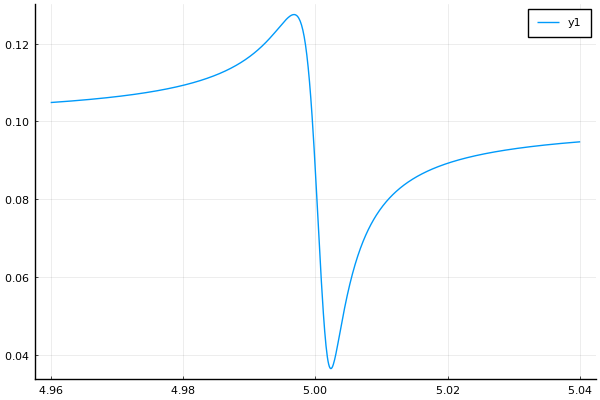

In [69]:
plot(fs, abs.(vs))